In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "finaldataframecopy_wWeather.csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/finaldataframecopy_wWeather.csv'

In [4]:
data = pd.read_csv(FINAL_DATA)

In [5]:
#Drop the columns for HexandMonth and TotalNarcan.  HEXandMonth is not needed and TotalNarcan may cause bias because
#the Narcan Administered already accounts for the TotalNarcan for the month. 

data = data.drop(['HexandMonth'], axis=1)
data = data.drop(['TotalNarcan'], axis=1)

In [6]:
data.columns

Index(['HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'NarcanAdministered', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split as tts 

features = data [[
    'HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(9444, 24)
(9444,)


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns  = [col for col in columns] 
        self.encoders = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns 
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        
        return output

In [9]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [10]:
# Try them all!
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [11]:
model_selection(X, y, LinearSVC())

1.0

In [12]:
model_selection(X, y, SVC())

0.93797953964194369

In [13]:
model_selection(X, y, SGDClassifier())

0.99969888587774769

In [14]:
model_selection(X, y, KNeighborsClassifier())

0.79550398839738945

In [15]:
model_selection(X, y, LogisticRegressionCV())

1.0

In [16]:
model_selection(X, y, LogisticRegression())

0.99969888587774769

In [17]:
model_selection(X, y, BaggingClassifier())

0.99939759036144571

In [18]:
model_selection(X, y, ExtraTreesClassifier())

1.0

In [19]:
model_selection(X, y, RandomForestClassifier())

1.0

In [20]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()

<IPython.core.display.Javascript object>


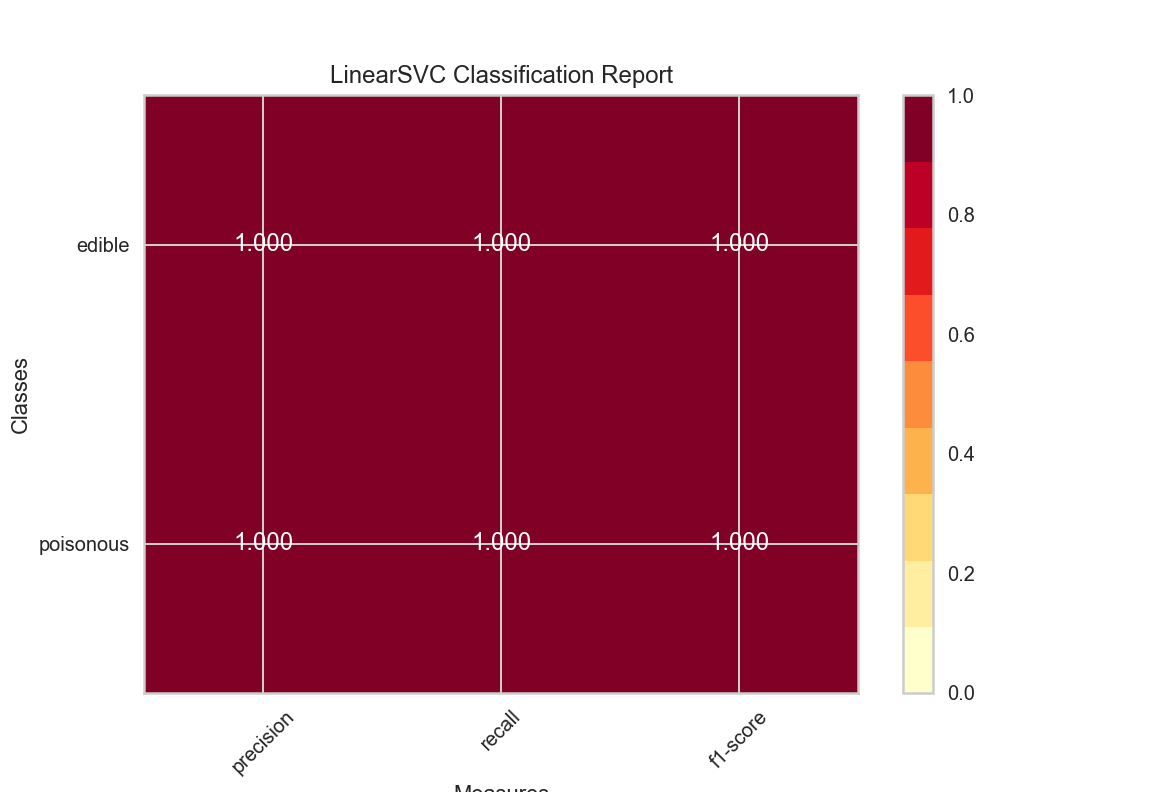

In [27]:
visual_model_selection(X, y, LinearSVC())

<IPython.core.display.Javascript object>


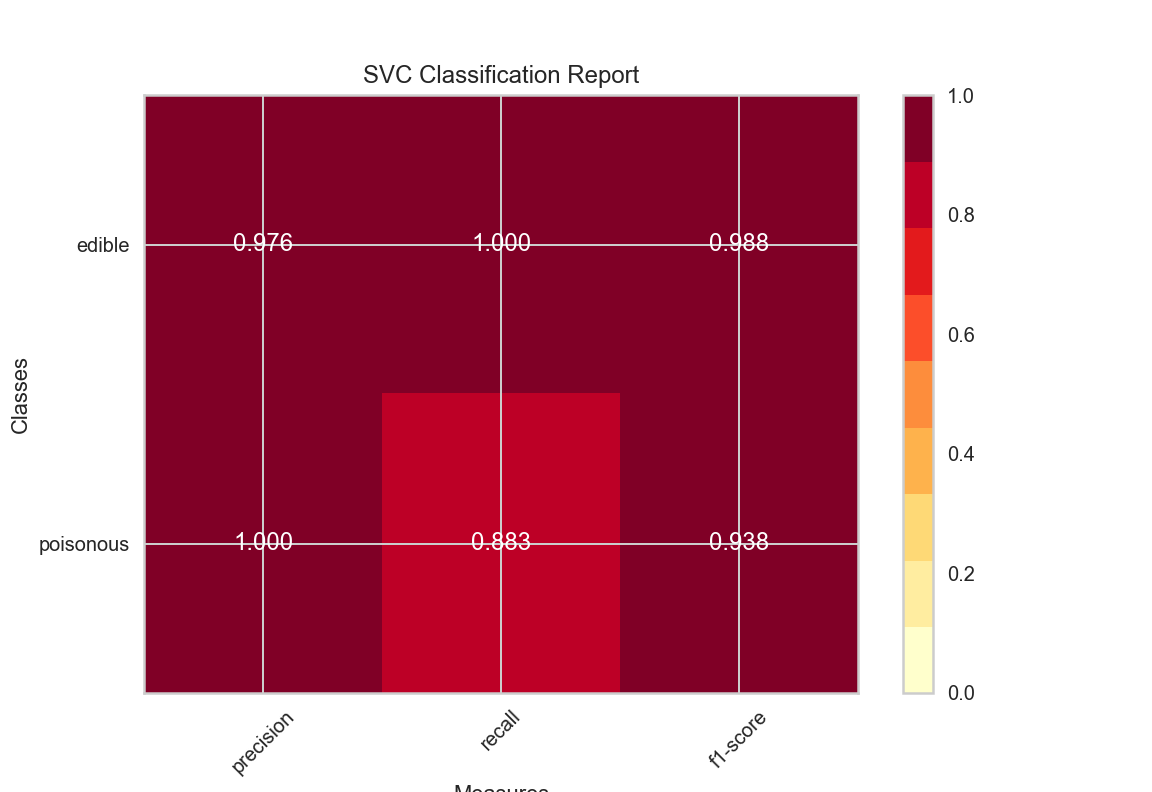

In [28]:
visual_model_selection(X, y, SVC())

<IPython.core.display.Javascript object>


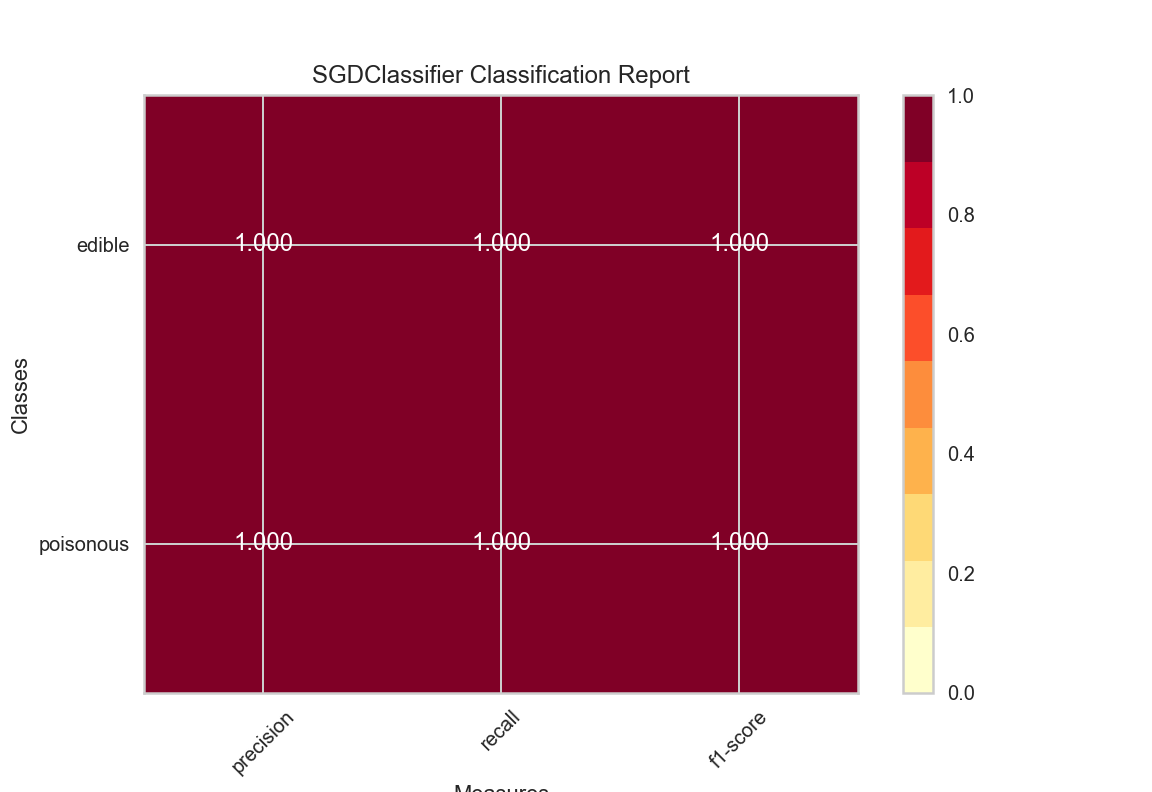

In [29]:
visual_model_selection(X, y, SGDClassifier())

<IPython.core.display.Javascript object>


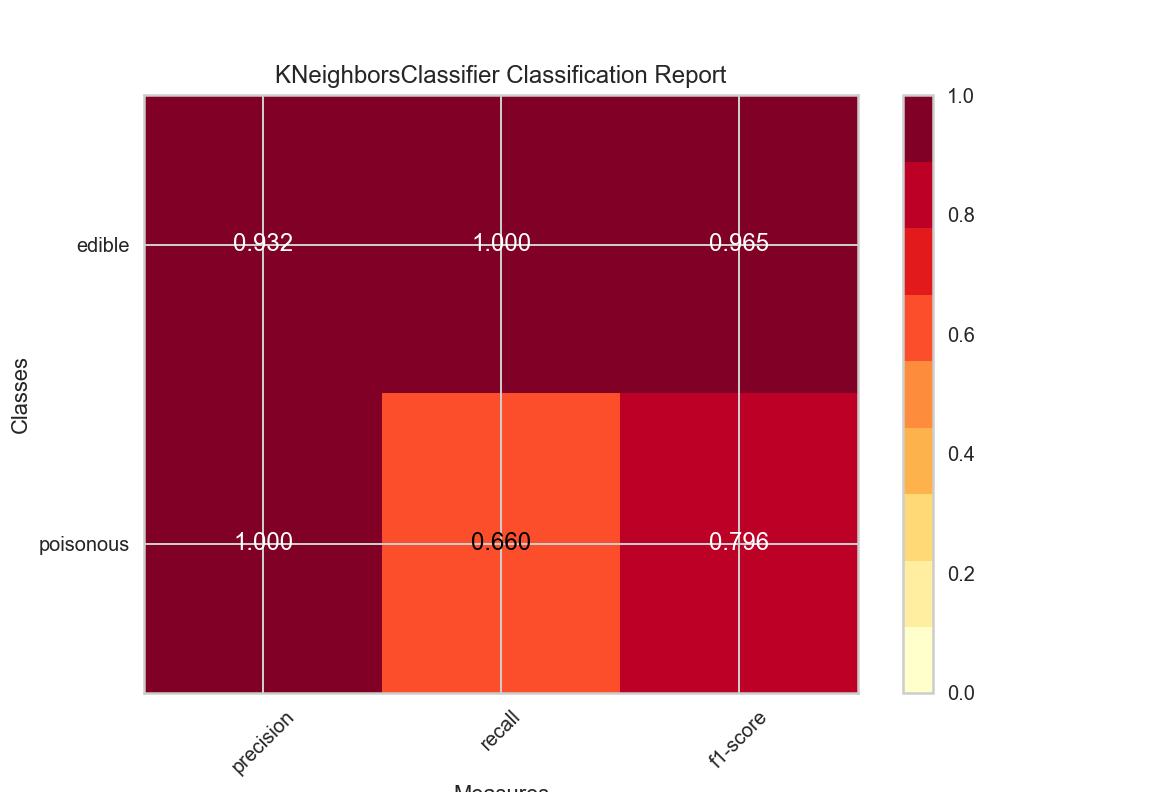

In [30]:
visual_model_selection(X, y, KNeighborsClassifier())

<IPython.core.display.Javascript object>


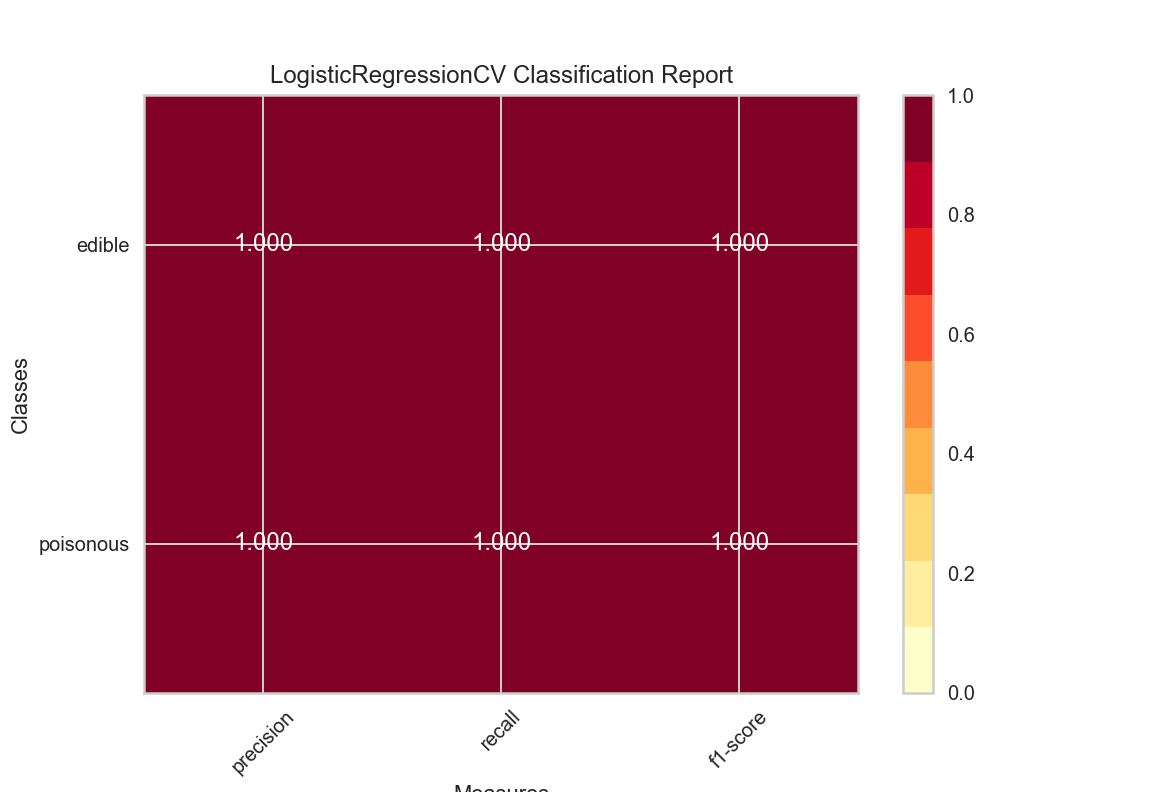

In [31]:
visual_model_selection(X, y, LogisticRegressionCV())

<IPython.core.display.Javascript object>


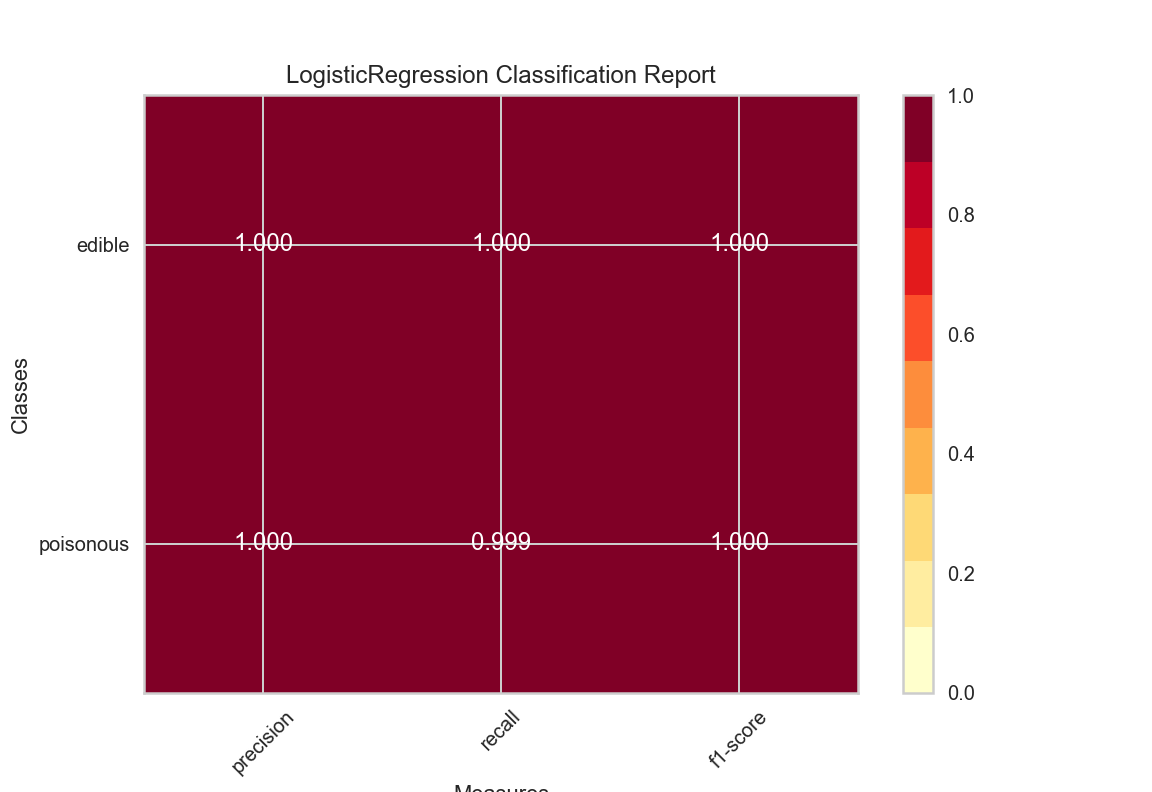

In [32]:
visual_model_selection(X, y, LogisticRegression())

<IPython.core.display.Javascript object>


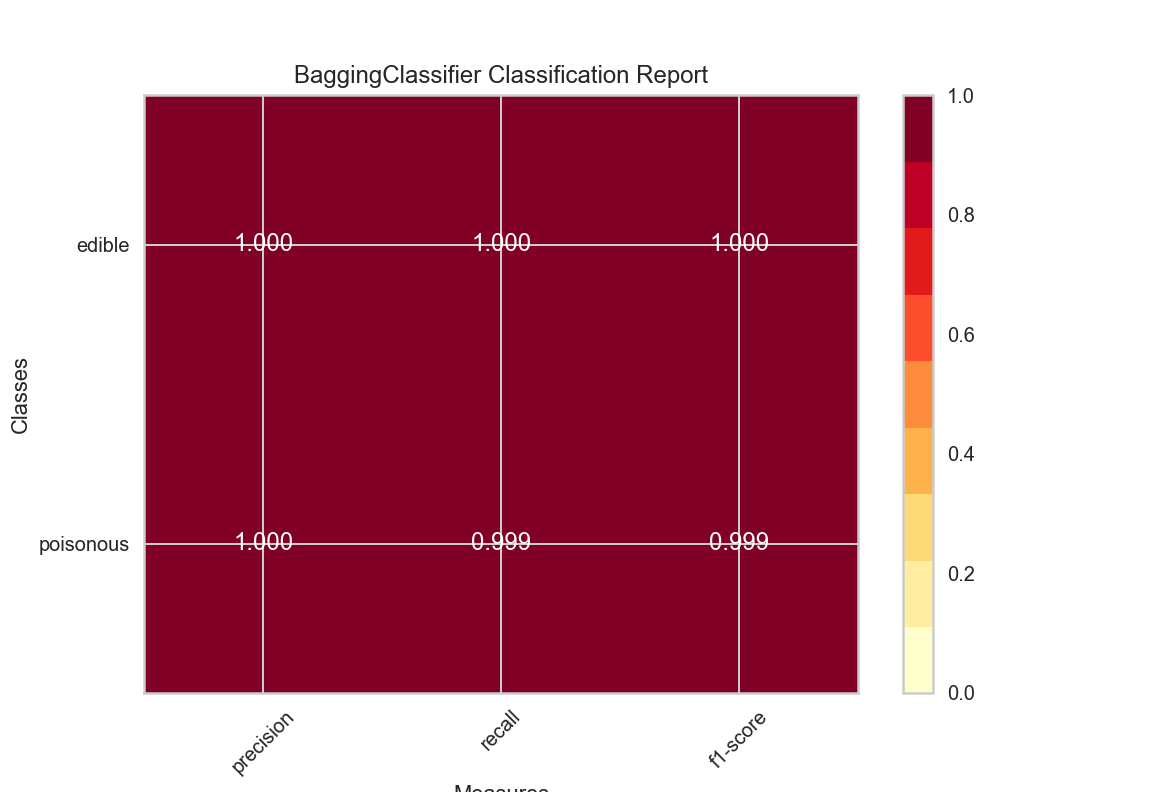

In [35]:
visual_model_selection(X, y, BaggingClassifier())


<IPython.core.display.Javascript object>


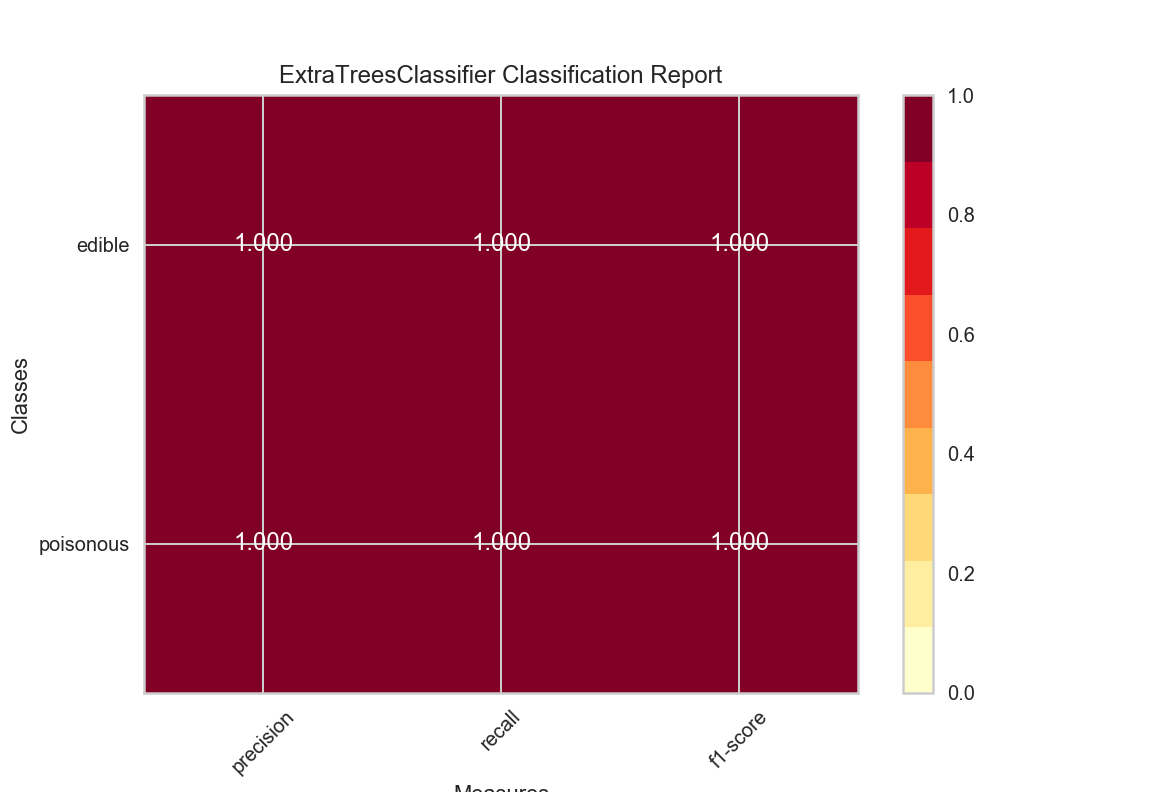

In [36]:
visual_model_selection(X, y, ExtraTreesClassifier())


<IPython.core.display.Javascript object>


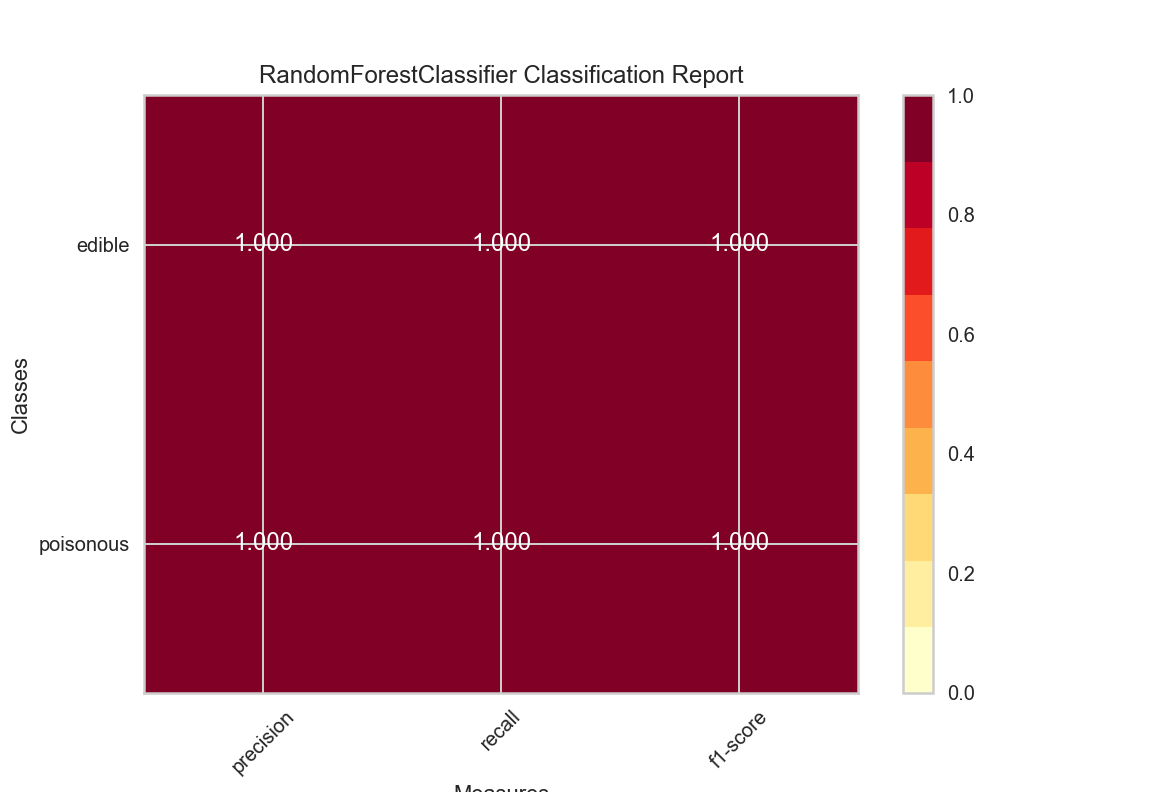

In [37]:
visual_model_selection(X, y, RandomForestClassifier())